# **Employee Attrition Prediction**

**This dataset was taken in kaggle:** https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

**Review Contents**

Data preprocessing; Handle Missing values, Dummy variables, correlation analysis, Data Scaling/Transformation, dimensionality reduction (at least 2 methods); strategies to avoid over fitting; ​

Data visualization and EDA(Plotly, Bokeh and Tableau to be employed to elicit intelligence with both static and dynamic features).​

Model1 –Classification and Regression (two models); Bagging, Boosting;Confusion Matrix, Accuracy, F-Measure, 10 fold cross validation, Student T-Test and RoC Tests​

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from bokeh.io import output_notebook
from bokeh.plotting import figure, show

In [ ]:
data =  pd.read_csv('/content/drive/My Drive/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
data.shape

(1470, 35)

In [ ]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
# count of the no of employees that stayed and left the company
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
#Visualizing Attrition count using plotly
df = px.data.tips()
fig = px.histogram(data, x="Attrition")
fig.show()

In [ ]:
# Age vs 	HourlyRate
output_notebook()
graph = figure(title='Age vs 	HourlyRate',
        plot_height=400,plot_width=700,
        x_axis_label='Age', y_axis_label='	HourlyRate',
        x_minor_ticks=2, y_range=(0, 300))
graph.scatter(data.Age,data.HourlyRate)
show(graph)

In [ ]:
output_notebook()
p = figure(title="Age vs MonthlyIncome", x_axis_label='Age', y_axis_label='MonthlyIncome')
p.triangle(data['Age'],data['MonthlyIncome'])
show(p)

In [ ]:
# Age vs PercentSalaryHike
output_notebook()
fig = figure(title='Age vs PercentSalaryHike',
             plot_height=400,plot_width=700,
             x_axis_label='Age', y_axis_label='PercentSalaryHike',
             x_minor_ticks=2, y_range=(0, 100))
fig.vbar(x=data.Age, bottom=0, top=data.PercentSalaryHike, 
         color='blue', width=0.5)
show(fig)

In [ ]:
output_notebook()
fig = figure(title='	PerformanceRating vs Age',
             plot_height=400,plot_width=700,
             x_axis_label='	PerformanceRating', y_axis_label='Age', y_range=(0,100))
fig.hbar(right=data.PerformanceRating,left=0,y=data.Age, 
         color='blue', width=0.5)
show(fig)

In [ ]:
data.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [ ]:
fig = px.histogram(data, x="Gender")
fig.update_layout(
    autosize=False,
    width=500,
    height=500
)
fig.show()

In [ ]:
#visualizing Dialyrates counts using plotly
import plotly.express as px
import numpy as np

df = px.data.tips()
# create the bins
counts, bins = np.histogram(df.total_bill, bins=range(0, 60, 5))
bins = 0.5 * (bins[:-1] + bins[1:])

fig = px.bar(x=bins, y=counts, labels={'x':'Dialyrates', 'y':'count'})
fig.show()

In [ ]:
# print all the data types and their unique  values
for column in data.columns:
  if data[column].dtype == object:
    print(str(column)+ ' : '+ str(data[column].unique()))
    print(data[column].value_counts())
    print('\n')

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64


BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64


JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Directo

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(data, x="MonthlyIncome", color="Gender")
fig.show()

In [ ]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
df = px.data.tips()
fig = px.pie(data, values='PercentSalaryHike', names='Department')
fig.show()

In [ ]:
#remove some useless Columns
data = data.drop('Over18', axis =1)
data = data.drop('EmployeeNumber', axis =1)
data = data.drop('StandardHours', axis =1)
data = data.drop('EmployeeCount', axis =1)

In [ ]:
data.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.034814,0.149515,-0.027269,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


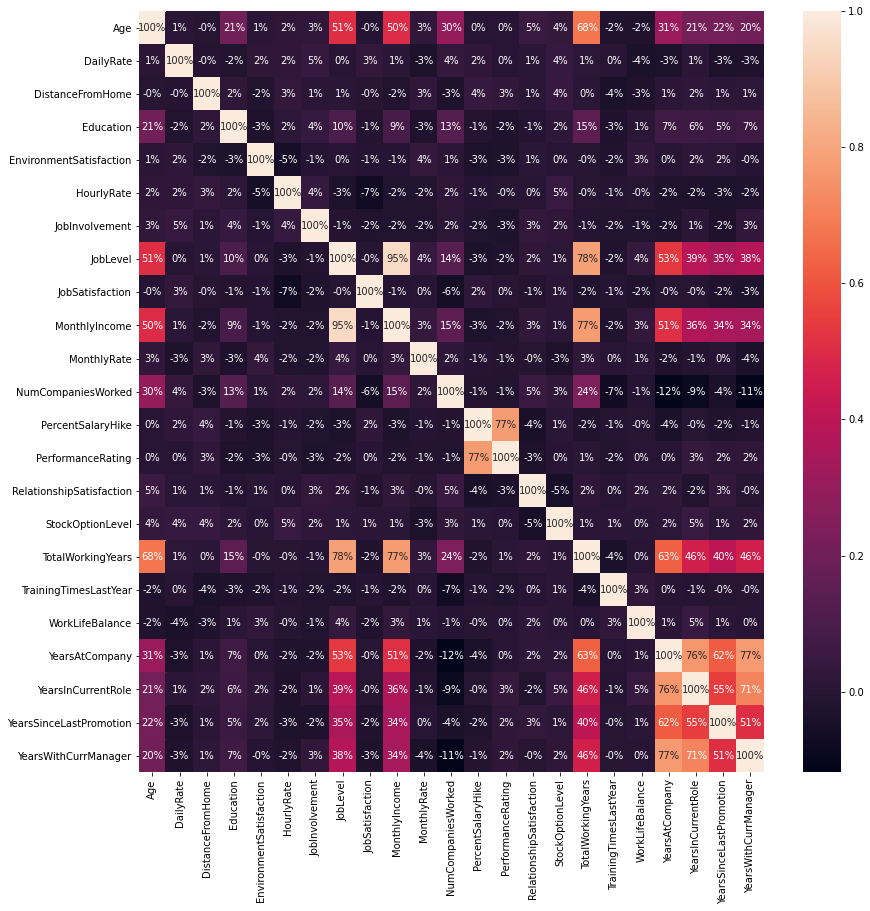

In [ ]:
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(), annot=True, fmt ='.0%')

In [ ]:
# Transform the data from non- numerical to numerical
from sklearn.preprocessing import LabelEncoder

for column in data.columns:
  if data[column].dtype == np.number:
    continue
  data[column] = LabelEncoder().fit_transform(data[column])  


In [ ]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,1,3,2,1,11,3,1,2,3,1,210,599,4,0,6,0,2,1,17,3,2,5,2,0,3
1466,21,0,2,327,1,5,0,3,3,1,12,1,2,0,0,1,1070,1123,4,0,4,0,0,1,9,5,2,7,7,1,7
1467,9,0,2,39,1,3,2,1,1,1,57,3,1,4,1,1,821,175,1,1,9,1,1,1,6,0,2,6,2,0,3
1468,31,0,1,579,2,1,2,3,3,1,33,1,1,7,1,1,730,641,2,0,3,0,3,0,17,3,1,9,6,0,8


## **Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
x=data.drop('DailyRate',axis=1)
y=data['DailyRate']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lm.intercept_)

429.71100814434413


In [ ]:
lm.coef_

array([-2.63311751e+00, -5.68167678e+01, -1.33087992e+01,  9.42904285e+00,
        1.02365634e+00, -1.21790174e+00,  1.59730007e+01,  3.05165094e+00,
        7.31942885e+00,  2.17606685e-01,  9.64857100e+00, -3.72031233e+01,
       -7.01298625e-01,  5.05043718e+00, -3.12408501e+01,  9.56385550e-02,
       -1.97968055e-02,  3.78317512e+00, -7.22971111e+00,  2.71216645e+00,
       -4.93722372e+00,  1.36407737e+01, -2.23520822e+00,  2.68366378e+00,
        6.86616819e+00, -2.65174150e+01, -1.70076699e+00,  2.57904064e+00,
        3.98115916e+00, -7.26342098e+00])

In [ ]:
x_train.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
cdf = pd.DataFrame(data=lm.coef_.reshape(30,1),index=x_train.columns,columns=['Coeff'])
cdf

,Coeff
Age,-2.633118
Attrition,-56.816768
BusinessTravel,-13.308799
Department,9.429043
DistanceFromHome,1.023656
Education,-1.217902
EducationField,15.973001
EnvironmentSatisfaction,3.051651
Gender,7.319429
HourlyRate,0.217607


In [ ]:
predictions = lm.predict(x_test)

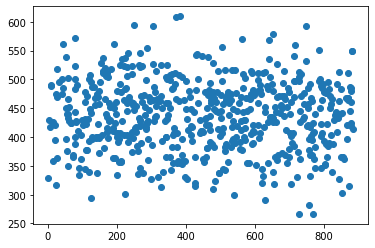

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

df = px.data.tips()
X = df.total_bill.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, df.tip)

x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))

fig = px.scatter(y_test,predictions)
fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Regression Fit'))
fig.show()

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 220.75618436880944
MSE: 66233.68961136816
RMSE: 257.35906747454646


# **Logistic Regression**

In [ ]:
X=data.drop('Attrition',axis=1)
y=data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
log=LogisticRegression(random_state=0)
log.fit(X_train,y_train)
log_pred=log.predict(X_test)
#Accuracy
log_acc=metrics.accuracy_score(y_test,log_pred)*100
log_ac=f'{accuracy_score(y_test, log_pred)*100:.2f}%'
print('LogisticRegression accuracy:',log_ac)

LogisticRegression accuracy: 84.35%


LogisticRegression_ConfusionMatrix:
 [[364   7]
 [ 62   8]]


Text(0.5, 1.0, 'Confusion Matrix of Logestic')

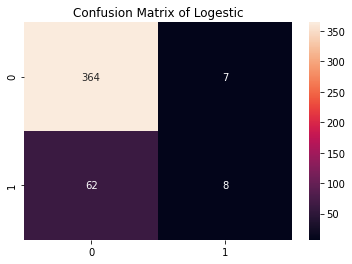

In [ ]:
#Confusion Matrix
log_cm=confusion_matrix(y_test,log_pred)
print('LogisticRegression_ConfusionMatrix:\n',log_cm)
sns.heatmap(log_cm,annot = True, fmt = "d")
plt.title('Confusion Matrix of Logestic')

In [ ]:
#Classification Report of model(F-Measure,Recall,Precision)
from sklearn.metrics import classification_report
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       371
           1       0.53      0.11      0.19        70

    accuracy                           0.84       441
   macro avg       0.69      0.55      0.55       441
weighted avg       0.80      0.84      0.80       441



In [ ]:
# 10 folds Cross-Validation
from sklearn.model_selection import cross_val_score
scores_log=cross_val_score(log, X, y, cv=10)
scores_log

array([0.84353741, 0.82993197, 0.82312925, 0.85034014, 0.85034014,
       0.85034014, 0.85034014, 0.83673469, 0.85714286, 0.85034014])

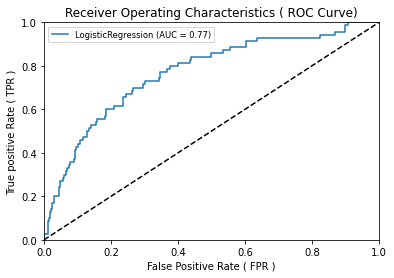

In [ ]:
#ROC Test
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log,X_test,y_test)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('Receiver Operating Characteristics ( ROC Curve)')
plt.xlabel('False Positive Rate ( FPR )')
plt.ylabel('True positive Rate ( TPR )')
plt.legend(loc=0,fontsize='small')
plt.show()

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier(max_depth=2, random_state=0)
Rf.fit(X_train,y_train)
Rf_pred=Rf.predict(X_test)
Rf_acc=metrics.accuracy_score(y_test,Rf_pred)*100
Rf_ac=f'{accuracy_score(y_test,Rf_pred)*100:.2f}%'
print('Random Forest Accuracy:',Rf_ac)

Random Forest Accuracy: 84.13%


RandomForest_ConfusionMatrix:
 [[371   0]
 [ 70   0]]


Text(0.5, 1.0, 'Confusion Matrix of RF')

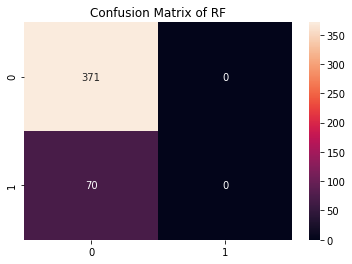

In [ ]:
#Confusion Matrix
Rf_cm=confusion_matrix(y_test,Rf_pred)
print('RandomForest_ConfusionMatrix:\n',Rf_cm)
sns.heatmap(Rf_cm,annot=True, fmt = "d")
plt.title('Confusion Matrix of RF')

In [ ]:
#Classification Report of model(F-Measure,Recall,Precision)
from sklearn.metrics import classification_report
print(classification_report(y_test,Rf_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       371
           1       0.00      0.00      0.00        70

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.71      0.84      0.77       441



In [ ]:
# 10 folds cross validation
from sklearn.model_selection import cross_val_score
scores_Rf=cross_val_score(Rf, X, y, cv=10)
scores_Rf

array([0.83673469, 0.83673469, 0.83673469, 0.83673469, 0.83673469,
       0.83673469, 0.83673469, 0.84353741, 0.84353741, 0.84353741])

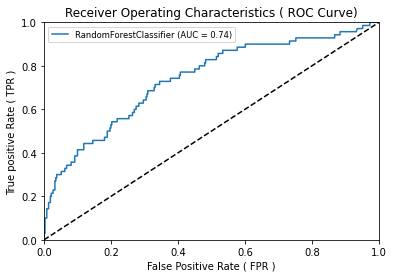

In [ ]:
#ROC Test
from sklearn.metrics import plot_roc_curve
plot_roc_curve(Rf,X_test,y_test)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('Receiver Operating Characteristics ( ROC Curve)')
plt.xlabel('False Positive Rate ( FPR )')
plt.ylabel('True positive Rate ( TPR )')
plt.legend(loc=0,fontsize='small')
plt.show()

# **Bagging**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
Bag=BaggingClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=1),n_estimators=200)
Bag.fit(X_train,y_train)
Bag_pred=Bag.predict(X_test)
#Accuracy
Bag_acc=metrics.accuracy_score(y_test,Bag_pred)*100
Bag_ac=f'{accuracy_score(y_test,Bag_pred)*100:.2f}%'
print('Bagging Accuracy:',Bag_ac)

Bagging Accuracy: 84.13%


Bagging_ConfusionMatrix:
 [[371   0]
 [ 70   0]]


Text(0.5, 1.0, 'Confusion Matrix of Bagging')

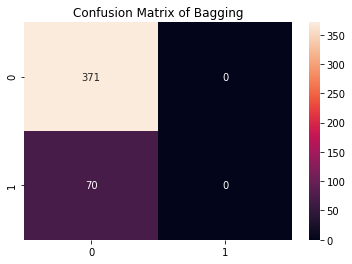

In [ ]:
#Confusion Matrix
Bag_cm=confusion_matrix(y_test,Bag_pred)
print('Bagging_ConfusionMatrix:\n',Bag_cm)
sns.heatmap(Bag_cm,annot=True,fmt = "d")
plt.title('Confusion Matrix of Bagging')

In [ ]:
# 10 folds cross validation
from sklearn.model_selection import cross_val_score
scores_Bag=cross_val_score(Bag, X, y, cv=10)
scores_Bag

array([0.83673469, 0.83673469, 0.83673469, 0.83673469, 0.83673469,
       0.83673469, 0.83673469, 0.84353741, 0.84353741, 0.84353741])

In [ ]:
#Classification Report of model(F-Measure,Recall,Precision)
from sklearn.metrics import classification_report
print(classification_report(y_test,Bag_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       371
           1       0.00      0.00      0.00        70

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.71      0.84      0.77       441



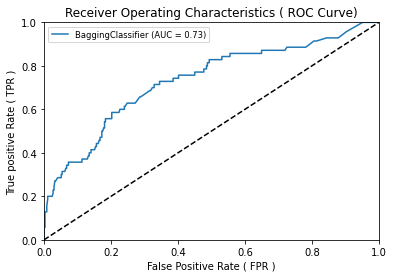

In [ ]:
#ROC Test
from sklearn.metrics import plot_roc_curve
plot_roc_curve(Bag,X_test,y_test)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('Receiver Operating Characteristics ( ROC Curve)')
plt.xlabel('False Positive Rate ( FPR )')
plt.ylabel('True positive Rate ( TPR )')
plt.legend(loc=0,fontsize='small')
plt.show()

# **AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ADA= AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=1),n_estimators=200,learning_rate=1)
ADA.fit(X_train,y_train)
ADA_pred=ADA.predict(X_test)
ADA_acc=metrics.accuracy_score(y_test,ADA_pred)*100
ADA_ac=f'{accuracy_score(y_test,ADA_pred)*100:.2f}%'
print('Adaboost Accuracy:',ADA_ac)

Adaboost Accuracy: 85.71%


Adaboost_ConfusionMatrix:
 [[351  20]
 [ 43  27]]


Text(0.5, 1.0, 'Confusion Matrix of Adaboost')

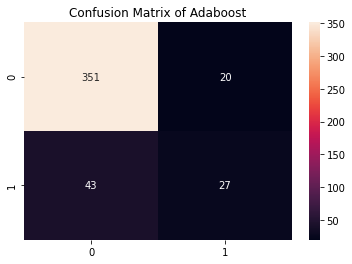

In [ ]:
#Confusion Matrix
ADA_cm=confusion_matrix(y_test,ADA_pred)
print('Adaboost_ConfusionMatrix:\n',ADA_cm)
sns.heatmap(ADA_cm,annot=True,fmt = "d")
plt.title('Confusion Matrix of Adaboost')

In [ ]:
#Classification Report of model(F-Measure,Recall,Precision)
from sklearn.metrics import classification_report
print(classification_report(y_test,ADA_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       371
           1       0.57      0.39      0.46        70

    accuracy                           0.86       441
   macro avg       0.73      0.67      0.69       441
weighted avg       0.84      0.86      0.85       441



In [ ]:
# 10 folds cross validation
from sklearn.model_selection import cross_val_score
scores_ADA=cross_val_score(ADA, X, y, cv=10)
scores_ADA

array([0.91156463, 0.85714286, 0.8707483 , 0.85034014, 0.85714286,
       0.86394558, 0.82993197, 0.83673469, 0.89115646, 0.87755102])

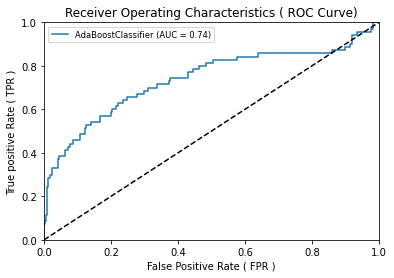

In [ ]:
#ROC Test
from sklearn.metrics import plot_roc_curve
plot_roc_curve(ADA,X_test,y_test)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('Receiver Operating Characteristics ( ROC Curve)')
plt.xlabel('False Positive Rate ( FPR )')
plt.ylabel('True positive Rate ( TPR )')
plt.legend(loc=0,fontsize='small')
plt.show()

**PCA**

In [ ]:
#PCA
from sklearn.decomposition import PCA
pcs = PCA()
pcs.fit(data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pcsSummary = pd.DataFrame({"Standard deviation":np.sqrt(pcs.explained_variance_),"Proportion of variance": pcs.explained_variance_ratio_,
"Cumulative proportion": np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,416.031661,4.487106e-01,0.448711
1,384.520611,3.833123e-01,0.832023
2,253.227897,1.662404e-01,0.998263
3,20.324064,1.070865e-03,0.999334
4,9.039627,2.118432e-04,0.999546
5,8.101771,1.701663e-04,0.999716
6,6.800643,1.198984e-04,0.999836
7,3.689502,3.528979e-05,0.999871
8,3.644144,3.442743e-05,0.999906
9,2.455661,1.563329e-05,0.999921


In [ ]:
pcsSummary= pcsSummary.transpose()
pcsSummary

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
Standard deviation,416.031661,384.520611,253.227897,20.324064,9.039627,8.101771,6.800643,3.689502,3.644144,2.455661,2.449410,2.284604,1.983649,1.895314,1.348395,1.270088,1.096488,1.088083,1.081253,1.012511,0.989747,0.712301,0.699392,0.657332,4.907851e-01,4.621269e-01,4.458349e-01,4.249607e-01,3.744488e-01,3.040096e-01,2.264160e-01
Proportion of variance,0.448711,0.383312,0.166240,0.001071,0.000212,0.000170,0.000120,0.000035,0.000034,0.000016,0.000016,0.000014,0.000010,0.000009,0.000005,0.000004,0.000003,0.000003,0.000003,0.000003,0.000003,0.000001,0.000001,0.000001,6.244480e-07,5.536509e-07,5.153019e-07,4.681781e-07,3.634950e-07,2.396007e-07,1.329009e-07
Cumulative proportion,0.448711,0.832023,0.998263,0.999334,0.999546,0.999716,0.999836,0.999871,0.999906,0.999921,0.999937,0.999951,0.999961,0.999970,0.999975,0.999979,0.999982,0.999985,0.999988,0.999991,0.999993,0.999995,0.999996,0.999997,9.999977e-01,9.999983e-01,9.999988e-01,9.999993e-01,9.999996e-01,9.999999e-01,1.000000e+00


In [ ]:
pcsSummary.columns = ["PC".format(i) for i in range(1, len(pcsSummary.columns) + 1)]

In [ ]:
pcsSummary.round(4)

,PC,PC,PC,PC,PC,PC,PC,PC,PC,PC,PC,PC,PC,PC,PC,PC,PC,PC,PC,PC,PC,PC,PC,PC,PC,PC,PC,PC,PC,PC,PC
Standard deviation,416.0317,384.5206,253.2279,20.3241,9.0396,8.1018,6.8006,3.6895,3.6441,2.4557,2.4494,2.2846,1.9836,1.8953,1.3484,1.2701,1.0965,1.0881,1.0813,1.0125,0.9897,0.7123,0.6994,0.6573,0.4908,0.4621,0.4458,0.425,0.3744,0.304,0.2264
Proportion of variance,0.4487,0.3833,0.1662,0.0011,0.0002,0.0002,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.0000
Cumulative proportion,0.4487,0.8320,0.9983,0.9993,0.9995,0.9997,0.9998,0.9999,0.9999,0.9999,0.9999,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.000,1.0000,1.000,1.0000


### **Student-T test**

In [ ]:
Rate = data['HourlyRate']
Rate

0       64
1       31
2       62
3       26
4       10
        ..
1465    11
1466    12
1467    57
1468    33
1469    52
Name: HourlyRate, Length: 1470, dtype: int64

In [ ]:
len(Rate)

1470

In [ ]:
sample_size=10
Rate_sample=np.random.choice(Rate,sample_size)

In [ ]:
Rate_sample

array([69, 56, 67,  7, 63, 57,  6, 66, 17, 42])

In [ ]:
from scipy.stats import ttest_1samp
ttest,p_value=ttest_1samp(Rate_sample,50)

In [ ]:
print(p_value)

0.5504547773635997


In [ ]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis
